<a id='contents'></a>
# Project: Investigate a Dataset - Medical Appointment No Shows

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#question 1">Research Question 1</a></li>
<li><a href="#question 2">Research Question 2</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#manythanks">Acknowledgement</a></li>    
</ul>

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='intro'></a>
## Introduction

### Dataset Description 

The current dataset contains patient information at various clinics in the neighbourhoods of the State of Espirito Santo, Brazil. 

There are 110527 entries with information for 110527 different appointments. The information is mainly based on patient characteristics grouped into 14 columns as follows:
1. Patient ID
2. Appointment ID
3. Gender
4. Scheduled Day
5. Appointment Day
6. Age
7. Neighbourhood
8. Scholarship
9. Hypertension
10. Diabetes
11. Alcoholism
12. Handicap
13. SMS received
14. Attended


### Question(s) for Analysis

In this project, the main goal is to explore what factors are of importance when trying to predict the attendance rate. The analysis will be directed toward answering the following questions:

1. How the characteristics associated with those who attended the appointment and who didn't compare?
2. What are the factors that influence the clinics in the neighbourhoods with a high attendance rate?

In [1]:
# Import relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as pe
from datetime import datetime, timezone # This has been added following the reviewer's note (Many thanks!)
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')


<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='wrangling'></a>

## Data Wrangling


### General Properties
We will start the data wrangling by exploring the csv data. This will be of help to us in order to identify further steps for data cleaning stage.

In [2]:
# Read the CSV file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


<a id='wrangling'></a>
    
<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

## Data Cleaning


The first thing to do for the data cleaning stage would be to change the column names so that we could make it easier to access all of the columns of interest.
	
Among these changes, we also need to change the format of the information related to missing appointments in order to avoid any confusion. Since the value Yes/1 in the 'no-show' column means that the person missed the appointment, it might be better to change the format of the column to 'attended' so that Yes/1 would tell us that the patient attended the appointment whilst No/0 that the patient has missed the appointment.

In [3]:
# Renaming the columns to make it easier to work with the dataset
df.rename(columns=lambda x: x.lower(),inplace=True)
df.rename(columns={'patientid':'patient_id', 
                   'appointmentid':'appointment_id',
                   'scheduledday':'scheduled_day',
                   'hipertension':'hypertension',
                   'handcap':'handicap',
                   'no-show':'attended', # Change the column name to 'attended'.
                   'appointmentday':'appointment_day'
}, inplace=True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [4]:
# Changing the format of the attended column to numeric

df.attended[df['attended'] == 'No'] = '1' # No is converted to be 1 as this means that the patient attended.
df.attended[df['attended'] == 'Yes'] = '0' # Yes is converted to be 0 as this means that the patient has not attended.
df['attended'] = pd.to_numeric(df['attended'])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [5]:
# Check the data count of the attended/missed appointments
df.groupby('attended', as_index=False)['age'].count() 

,attended,age
0,0,22319
1,1,88208


In [6]:
# Checking the NaN cells in the dataset
df.isna().sum()

patient_id         0
appointment_id     0
gender             0
scheduled_day      0
appointment_day    0
age                0
neighbourhood      0
scholarship        0
hypertension       0
diabetes           0
alcoholism         0
handicap           0
sms_received       0
attended           0
dtype: int64

In [7]:
# Checking the duplicated cells in the dataset
df.duplicated().sum()

0

In [8]:
# Checking if each appointment is unique to make sure that the dataset does not have duplicated appointment IDs
df['appointment_id'].nunique() == df['appointment_id'].count()

True

In [9]:
# Checking data types in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id         110527 non-null float64
appointment_id     110527 non-null int64
gender             110527 non-null object
scheduled_day      110527 non-null object
appointment_day    110527 non-null object
age                110527 non-null int64
neighbourhood      110527 non-null object
scholarship        110527 non-null int64
hypertension       110527 non-null int64
diabetes           110527 non-null int64
alcoholism         110527 non-null int64
handicap           110527 non-null int64
sms_received       110527 non-null int64
attended           110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


#### Uniformising the time and date information

The time information is only present in the 'scheduled_day' column whilst the 'appointment_day' holds the dates only. Therefore, for ease of reference, we will change the format of the 'scheduled_day' to show only the dates.

In [10]:
# Convert date and time to datetime64[ns, UTC] format
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'],utc=True)
df['appointment_day'] = pd.to_datetime(df['appointment_day'], utc=True)

In [11]:
# Change the 'scheduled_day' format to include the date only
df['scheduled_day'] = pd.to_datetime(df['scheduled_day'].dt.date, utc=True)

In [12]:
# Check the data format
print(df['scheduled_day'].dtype, df['appointment_day'].dtype)

datetime64[ns, UTC] datetime64[ns, UTC]


In [13]:
# Check the 'scheduled_day' data being changed to yyyy-mm-dd format
df.head(1) 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
0,2.987250e+13,5642903,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,1


In [14]:
df.describe() # Check other parameters of the data.

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,0.798067
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,0.401444
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,1.000000


#### Cleaning 'age' column

We can see that there is one entry with the age -1. This might be related to a prenatal care check-up appointment. However, since we do not have enough data on what this might be, it would be best to drop this row.

On the other side, there is no need to drop the max-age value of 115 since Brazil is well known to host several super-centenary as per [this link](https://gerontology.fandom.com/wiki/List_of_Brazilian_supercentenarians).

In [15]:
# Link the index value of the -1 age row to a variable
under_0 = df.query('age < 0') 
# Drop the -1 age row
df.drop(under_0.index, inplace=True) 

In [16]:
# Confirm that the -1 age row has been dropped
df.query('age < 0') 

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended


#### Check the data by the 'appointment_day' to explore any inconsistent information related to the work days.

We will explore the clinics' workdays. If the clinics usually work on weekends we could explore if the patients miss more appointments on weekends on weekdays.

In [17]:
# Group the data by the appointment day 
work_day = df.groupby('appointment_day', as_index=False)['age'].count() 

In [18]:
# Add an additional column to represent the day of the week
work_day['day_week'] = work_day['appointment_day'].dt.day_name()

In [19]:
# Check the clinics' work days
work_day.groupby('day_week', as_index=False).size()

day_week
Friday       5
Monday       5
Saturday     1
Thursday     4
Tuesday      6
Wednesday    6
dtype: int64

It seems that there have been some appointments on Saturday. According to the data, this is unusual. 

In [20]:
# Query Saturday
work_day.query('day_week == "Saturday"') 

,appointment_day,age,day_week
11,2016-05-14 00:00:00+00:00,39,Saturday


#### Upon checking the working days of the clinics, we can see that the clinics are working during the weekdays, with a couple of exceptions.
> On Saturday, May 14 2016, the data shows that there were 39 appointments. 
> This is the only Saturday with appointments at Espírito Santo clinics. 
> Therefore, we need to drop the appointments on "2016-05-14" and trim our findings to the weekdays. 

> On top of that, we can see that none of the clinics worked on a couple of days in May (23 (Mon), 26 (Thu) and 27 (Fri)).

Bottom line, since these are not bank holidays in Brazil nor the State of Espírito Santo, we cannot determine the reason behind this, therefore, we will not further explore this particular finding. 

In [21]:
# Dropping the rows for Saturday, May 14 2016.
sat_index = df.query('appointment_day == "2016-05-14"')
df.drop(sat_index.index, inplace=True)

In [22]:
# Checking that the rows with the Saturday, May 14 2016 values have been dropped.
df.query('appointment_day == "2016-05-14"')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended


---

Additionally, check the min and max average values grouped by the neighbourhood column.

In [23]:
# Check the average values 
df.groupby('neighbourhood').mean().describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
count,8.100000e+01,8.100000e+01,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000,81.000000
mean,1.451436e+14,5.676465e+06,37.691795,0.091231,0.189285,0.069326,0.028852,0.022997,0.322615,0.794528
std,4.058508e+13,1.758561e+04,5.742571,0.073012,0.091218,0.036153,0.028990,0.021082,0.081872,0.097236
min,3.895708e+12,5.583948e+06,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.339306e+14,5.665410e+06,34.614286,0.020604,0.134831,0.054264,0.006849,0.007411,0.296426,0.782546
50%,1.424815e+14,5.681297e+06,36.235484,0.088132,0.215137,0.074951,0.022409,0.020777,0.332845,0.802412
75%,1.565115e+14,5.688532e+06,40.958333,0.136926,0.258447,0.094340,0.041477,0.033385,0.365484,0.820093
max,3.528542e+14,5.702727e+06,54.500000,0.280751,0.347541,0.135417,0.146840,0.108571,0.600000,1.000000


We can see that the min average value of the attended data is 0 and the max is 1. Further investigation is required.

In [24]:
# Query the mean value of the attended column by the value of 1
df.groupby('neighbourhood').mean().query('attended == 1')

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
neighbourhood,,,,,,,,,,
PARQUE INDUSTRIAL,8.255992e+12,5663947.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [25]:
# Query the mean value of the attended column by the value of 0
df.groupby('neighbourhood').mean().query('attended == 0')

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
neighbourhood,,,,,,,,,,
ILHAS OCEÂNICAS DE TRINDADE,3.895708e+12,5583947.5,54.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0


The major differences between the two are the remaining days to the appointment and age. Since there is limited information on these neighbourhoods, it would be best to drop them off.

In [26]:
# Find out the index number of the rows that are exceptions.
df.query('neighbourhood == "PARQUE INDUSTRIAL"')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
75199,8.255992e+12,5663947,F,2016-05-05 00:00:00+00:00,2016-05-05 00:00:00+00:00,17,PARQUE INDUSTRIAL,0,0,0,0,0,0,1


In [27]:
# Find out the index number of the rows that are exceptions.
df.query('neighbourhood == "ILHAS OCEÂNICAS DE TRINDADE"')

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended
48754,5.349869e+11,5583947,F,2016-04-14 00:00:00+00:00,2016-05-13 00:00:00+00:00,51,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0
48765,7.256430e+12,5583948,F,2016-04-14 00:00:00+00:00,2016-05-13 00:00:00+00:00,58,ILHAS OCEÂNICAS DE TRINDADE,0,0,0,0,0,0,0


In [28]:
# Drop the rows that are exceptions.
df.drop([48754, 75199, 48765], axis=0, inplace=True)

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>


<a id='eda'></a>
## Exploratory Data Analysis

In this section, we will explore the mean values of all the factors that might predict the attendance rate. 

However, to make better use of the available data, we will include the number of days left before the appointment. This will be calculated by subtracting the scheduled_day values from the appointment_day values. Hopefully, this will give us an additional factor to better predict a higher attendance rate.

#### Calculate the average number of days remaining from the scheduled day to the appointment day and insert the results into a new column 'days_to_appointment'.

The column 'days_to_appointment' will contain the number of days left from the day it was booked to the day the patient needs to show up at the clinic. Zero days means same-day appointments.

In [29]:
# Calculate the difference between the appointment day and the scheduled day. The result to be added to a new column.is 
df['days_to_appointment'] = ((df['appointment_day'] - df['scheduled_day']).astype('timedelta64[D]')).astype(int) # Convert to show only the number of days

In [30]:
# Check the data type
df.days_to_appointment.dtype

dtype('int64')

In [31]:
# Remove the patient_id and appointment_id columns as these contain personalised 
# data that is out of the scope of this analysis.
df.drop(['patient_id', 'appointment_id'], axis=1, inplace=True)

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='question 1'></a>
### Research Question 1: How do the two patient characteristics (scholarship and received SMS) compare between the patients who received each of them and those who didn't?

To explore the answer to this question, we need to organise the data  so that we could calculate the percentage of the patients with and without scholarship and SMS received.

In [32]:
# Count groupby with rename() and transform() with lambda functions.
df_sms=df.groupby(['sms_received', 'attended'])['attended'].count().rename("%sms_received").groupby(level = 0).transform(lambda x: x/x.sum())
# Check the data
df_sms

sms_received  attended
0             0           0.166993
              1           0.833007
1             0           0.275762
              1           0.724238
Name: %sms_received, dtype: float64

In [33]:
# Count groupby with rename() and transform() with lambda functions.
df_scholar=df.groupby(['scholarship', 'attended'])['attended'].count().rename("%scholarship").groupby(level = 0).transform(lambda x: x/x.sum())
# Check the data
df_scholar

scholarship  attended
0            0           0.198041
             1           0.801959
1            0           0.237429
             1           0.762571
Name: %scholarship, dtype: float64

At this point, we can see that in both cases the percentage of patients who attended without receiving SMS or having a scholarship is greater than the ones who did have any of them. 

It is worth mentioning that we are looking at patients who only have one of the characteristics, despite the fact that the observations are combined. Analysing the patients who have both of the characteristics is not the scope of this project. Therefore, even if both characteristics are mentioned, the attendance rate is considered individually. 

For a better understanding, we will explore the above through bar charts.

#### Creating visuals for question 1

In [34]:
# Defining a function to help with repetitive codes
def pathstroke():
    '''
    docstring: Creat visual effects for plot labels to be used to define path_effects values inside the plot's parameters.
    input: None
    output: Stroke contour effects colour blue applied to a black font.
    '''
    [pe.Stroke(linewidth=0.2, foreground='k'),pe.Normal()]

In [35]:
def myBar(df,X=['Not Attended', 'Attended'], title=''):
    ''''
    docstring: Create a bar plot with 4 bars that overlap.
    input: dataframe, 'column name'
    export:
    '''
    # Set the plot dimensions
    plt.figure(figsize=[5,5])
    # Set general font size
    plt.rcParams['font.size'] = '12'
    # 1st bar chart
    plt.bar(X, df[0:2]*100, color='g',width=0.8, align='center') # multiply by 100 to transform into percentage
    # 2nd bar chart
    plt.bar(X, df[2:4]*100, color='b', alpha=.8, width=.6, align='center') # multiply by 100 to transform into percentage
    # Add x label and format it
    plt.xlabel("Attended Status", size=12, color='C0', path_effects=pathstroke())
    # Add y label and format it
    plt.ylabel(f"Percentage of {title}", size=12, color='C0', path_effects=pathstroke())
    # Add title and format it
    plt.title(f"Percentage of {title} by Attended Status", size=14, color='C0', path_effects=pathstroke())
    # Add keys to the chart
    plt.legend([f"No {title}",f"{title}"])

Now, by using the myBar function, we can visualise the data regarding the attendance rate of the ones with and without scholarship/receiving SMS.

We will use two distinct colours, green and blue to mark the data. Also, the bar charts with the same info (attendance rate) will be overlayed in an attempt to produce a better understanding.

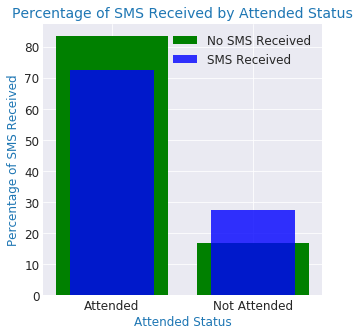

In [36]:
myBar(df_sms, title='SMS Received')

We can see that the patients who did not receive an SMS had a higher rate of attendance than the ones who did. Therefore, probably receiving an SMS is not an important factor in raising the attendance rate. However, due to the limitations associated with the available information, we can't make a definitive statement. More details are in the Limitation section.

Next we will look at the scholarship data based on the attendance rate.

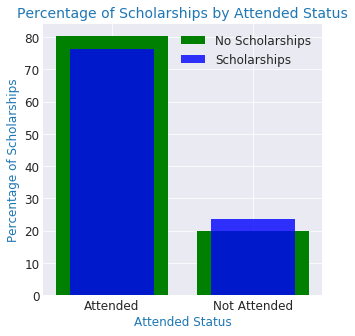

In [37]:
# Produce a bar chart using scholarship data
myBar(df_scholar, title='Scholarships')

We can see that those who received scholarships have slightly worse attendance rate than the ones who did not receive one. 

Around 25% of patients with a scholarship will miss an appointment whilst 20% of the patients without a scholarship will miss an appointment.

However, we can observe at least on limitation associated with the current data. Simalarly to the above, previous history of attendance is unknown. More details in the Limitations section.

<a id='wrangling'></a>
    
<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='question 2'></a>
### Research Question 2 - What are the factors that influence the clinics in the neighbourhoods with a high attendance rate?

In [38]:
def myBarPlot(df,xVar, title=''):
    '''
    docstring: Create a bar plot to represent average values of various characteristics.
    inputs: dataframe, 'column name', bar=False/True, title='additional text'
    output: a bar plot with an optional plot line to link the top of the bars
    '''
    # Set plot dimensions
    plt.figure(figsize=[14,6])
    # Set general font size
    plt.rcParams['font.size'] = '18'
    # Add a plot line to link the bars
    plt.plot(df[xVar].index,df[xVar], color='w', lw=4, path_effects=[pe.Stroke(linewidth=7, foreground='k'), pe.Normal()])
    # Plot
    plt.bar(df[xVar].index, df[xVar], label=xVar,tick_label=['Lowest 25%', 'Highest 25%'])
    # Set y limit
    plt.ylim(df[xVar].min()*0.95)  
    # Add x label and format it
    plt.xlabel(f"{title}", size=20, color='C0', path_effects=pathstroke())
    # Add y label and format it
    plt.ylabel(f"Average {xVar}".replace('_',' ').title(), size=20, color='C0',path_effects=pathstroke())
    # Add title and format it
    plt.title(f"Average {xVar} by {title}".title().replace('_',' '), size=20, color='C0', path_effects=pathstroke())
    # Set x ticks font size
    plt.xticks(fontsize=18)
    
    

In [39]:
# Group the data by neighbourhood and find out the mean values
df_nhood = df.groupby('neighbourhood').mean()
df_nhood.head(1)

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,days_to_appointment
neighbourhood,,,,,,,,,
AEROPORTO,53.125,0.0,0.25,0.0,0.0,0.0,0.125,0.875,14.75


In [40]:
# Cut attended data into a new column 'attendance_rate' by the average values in the attended column.
# Cut data will be placed into four categories: Low, Medium, Moderately High and High.
df_nhood['attendance_rate'] = pd.qcut(df_nhood['attended'], 4, ['Low', 'Medium', 'Moderately High', 'High'])
df_nhood.head()

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attended,days_to_appointment,attendance_rate
neighbourhood,,,,,,,,,,
AEROPORTO,53.125000,0.000000,0.250000,0.000000,0.000000,0.000000,0.125000,0.875000,14.750000,High
ANDORINHAS,36.106101,0.142794,0.259063,0.132184,0.022989,0.040230,0.250663,0.769673,8.763926,Low
ANTÔNIO HONÓRIO,36.845018,0.051661,0.018450,0.011070,0.000000,0.003690,0.343173,0.815498,13.656827,Moderately High
ARIOVALDO FAVALESSA,32.480144,0.187726,0.122744,0.068592,0.050542,0.036101,0.202166,0.776173,7.173285,Low
BARRO VERMELHO,45.040189,0.000000,0.134752,0.054374,0.004728,0.014184,0.338061,0.784870,7.342790,Medium


In [41]:
# Check the data for null values.
df_nhood.isnull().sum()

age                    0
scholarship            0
hypertension           0
diabetes               0
alcoholism             0
handicap               0
sms_received           0
attended               0
days_to_appointment    0
attendance_rate        0
dtype: int64

In [42]:
# Group data by low and high attendance rates to compare the characteristics of the two.
df_mean = df_nhood.groupby('attendance_rate', as_index=False).mean().query('attendance_rate == ["Low","High"]')
df_mean.reset_index(drop=True, inplace=True)
df_mean.drop(['attendance_rate', 'attended'], axis=1, inplace=True)

In [43]:
list_column = df_mean.columns.unique()
list_column

Index(['age', 'scholarship', 'hypertension', 'diabetes', 'alcoholism',
       'handicap', 'sms_received', 'days_to_appointment'],
      dtype='object')

In [44]:
df_mean

,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,days_to_appointment
0,36.83872,0.122110,0.234322,0.080006,0.036179,0.029156,0.320542,10.321110
1,40.15867,0.066447,0.198183,0.070522,0.021716,0.029143,0.315502,9.105819


#### Creating the visuals for question 2

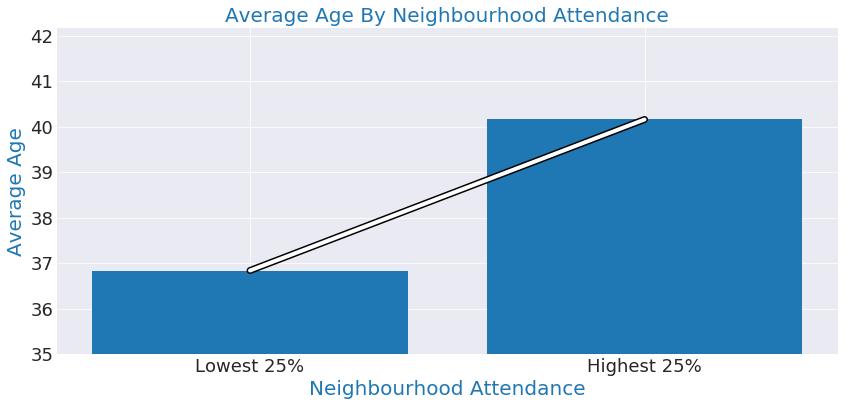

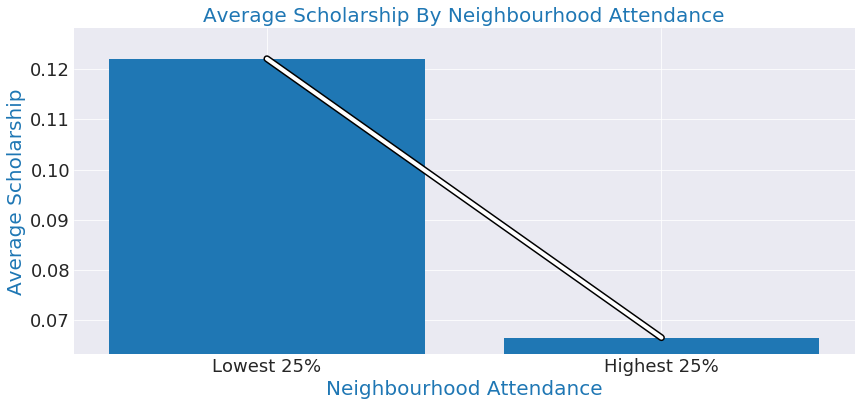

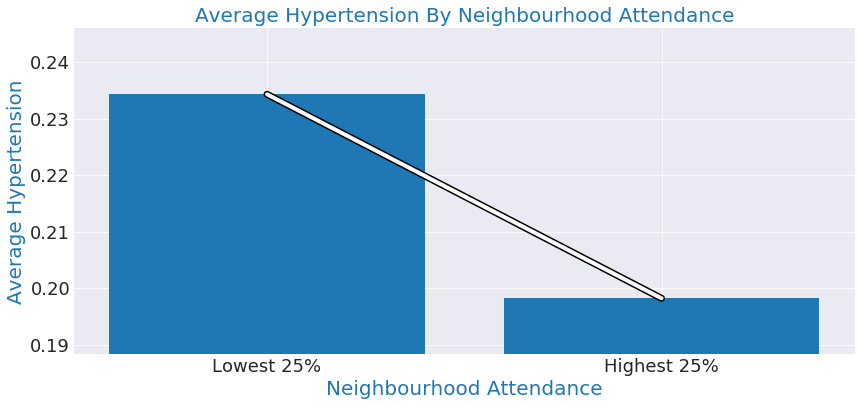

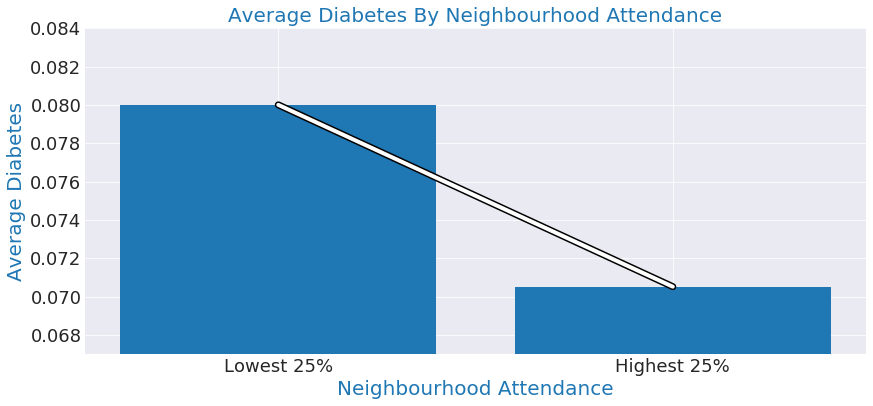

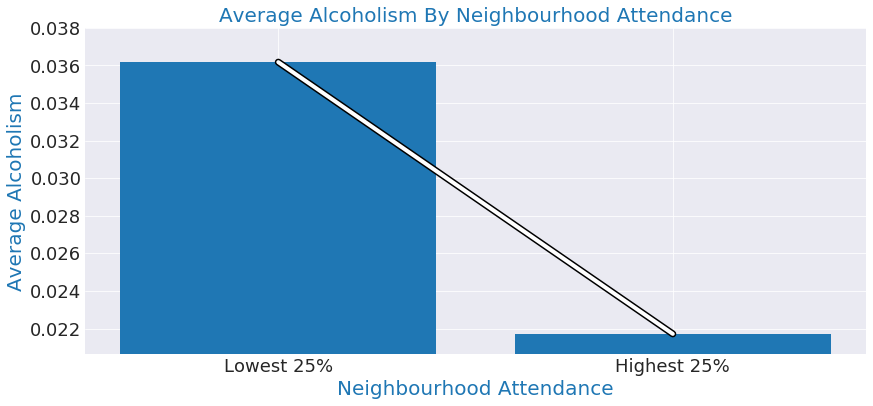

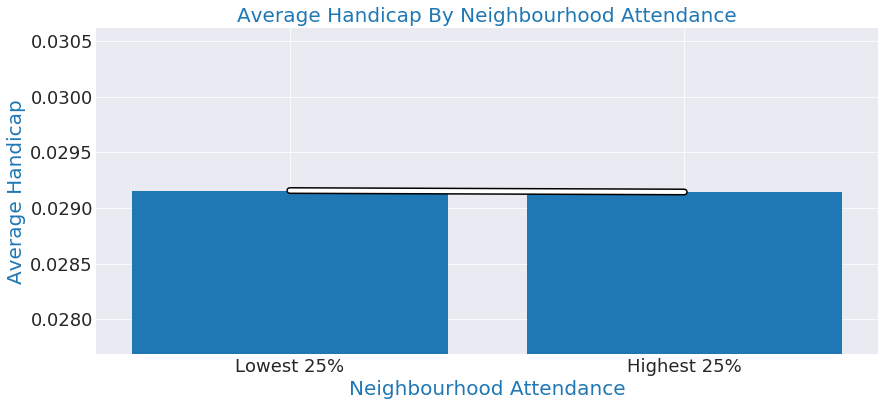

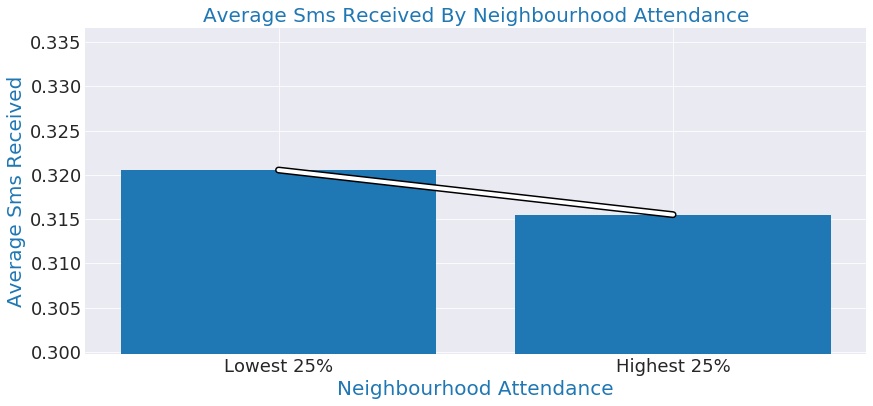

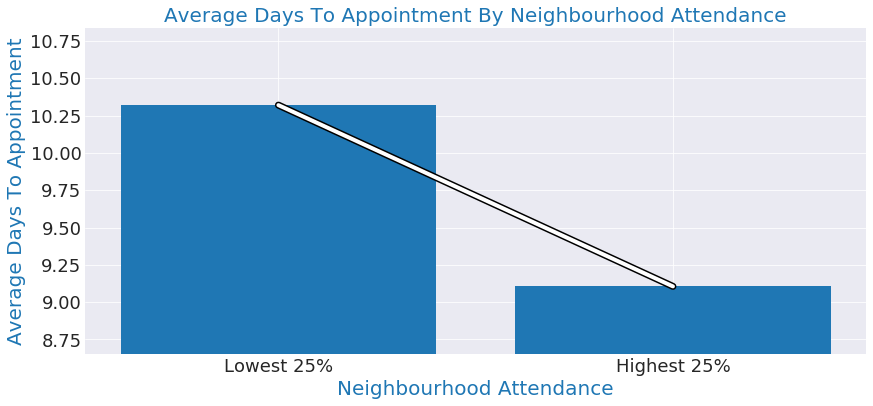

In [45]:
# Create visuals by iterating through the column list 
for c in list_column:
    myBarPlot(df_mean, c, title='Neighbourhood Attendance')

We can see that this particular approach of visualising all of the characteristics in one go, helps us navigate through the bar charts with ease. 

An interesting feature of the data is that the neighbourhoods with 75% higher attendance tend to score lower average values of the patient's characteristics, such as having fewer scholarships and being less affected by alcoholism. These two are the characteristic that portrays the biggest difference between the two categories of neighbourhoods. 

More details are revealed in the conclusion section.

In [46]:
# Define a function to show the percentage change of the attended data
def myPChange(df, xVar):
    '''
    docstring: Calculate the percentage change from the previous value
    inputs: dataframe,'column name'
    output: 2nd float value showing percentage change from previous value 
    '''
    print(df[xVar].pct_change().iloc[[1]])

In [47]:
# Show percentage change by iterating through the column list 
for c in list_column:
    myPChange(df_mean, c)

1    0.090121
Name: age, dtype: float64
1   -0.455846
Name: scholarship, dtype: float64
1   -0.15423
Name: hypertension, dtype: float64
1   -0.118539
Name: diabetes, dtype: float64
1   -0.399756
Name: alcoholism, dtype: float64
1   -0.000445
Name: handicap, dtype: float64
1   -0.015725
Name: sms_received, dtype: float64
1   -0.117748
Name: days_to_appointment, dtype: float64


As mentioned above, the biggest difference between the neighbourhood with the highest 75% attendance rate compared to the ones with the lowest 25% is in the scholarships and alcoholism. 

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='conclusions'></a>
## Conclusions

At this stage, we can split the conclusions into two groups based on:

1. How do the two patient characteristics (scholarship and received SMS) compare between the patients who received each of them and those who didn't?
2. Determinant characteristics at the neighbourhood clinics based on four levels of attendance; 

In the first part, the results of the data comparison between the patients who received an SMS and attended their appointments and the ones who didn't show us that receiving an SMS is not necessarily a determinant factor to increase the attendance rate. Almost 30% of patients who received an SMS did miss their appointment whilst almost 20% of patients who did not receive an SMS missed their appointment. 

Equally, having a scholarship did not prove to be a determinant factor as well. Around 25% of patients with a scholarship will miss an appointment whilst 20% of the patients without a scholarship will miss an appointment.

On the other hand, in the second part of this analysis, the data was grouped slightly different. We saw the comparison between the neighbourhoods with a lower 25% attendance rate and the ones with a higher 75% one. This comparison revealed the following characteristics for the patients of the latter category:

- are older by 9%;
- have been awarded fewer scholarships by 45%;
- have a lower rate of hypertension by 15%;
- are less affected by diabetes by 11%;
- are less affected by alcoholism by almost 40%;
- no significant difference in handicap;
- no significant difference in the number of SMS received;
- have booked the appointment in advance by 11% fewer days.

At this point, compiling the information from both questions we can sketch the conclusions around the points:

- Age is not a determinant factor related to attendance rate;
- Scholarship is an important factor to influence the attendance rate: those with fewer will attend more;
- Hypertension will relatively predict who will generally attend an appointment, however, based on the patient's neighbourhood, some factors will influence patients to miss more of their appointments.
- Diabetes is a relatively important predictor of a patient attending the appointment, however, this is dependent on other factors related to each particular neighbourhood;
- Alcoholism is not an overall predictor of attendance, however, based on particular neighbourhoods, patients that are not affected by alcoholism will attend more;
- Handicap is not a determinant factor related to attendance rate;
- SMS received are not of extreme importance in predicting the attendance rate;
- Booking the appointment in advance is an important factor that predicts the attendance rate by a high margin.



<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='limitations'></a>
### Limitations

In addition, it is important to mention, that the conclusions related to some of the characteristics could have been more accurate with an additional column that shows if the appointment has been rescheduled or cancelled. Also, attended information could further be split into two: 'attended with no reschedule' and 'attended following x reschedules'.

Also, we saw limitations related to the reason behind an SMS being sent to a specific patient. This would have helped us when we were interpreting the data of patients who received an SMS but did not attend the appointment compared with those who also received the SMS, but attended the appointment. For example, if the clinics will send an SMS because a patient has a history of missing appointments, then a new group is delineated and namely patients with a tendency to miss appointments. Around a 70% attendance rate would be considered a great success. 

Similarly to the above, previous history of attendance would have been useful to better understand the impact of scholarships on the patient's attendance rate. Since this information is missing, we can't tell for sure if missing an appointment was due to a financial issue that the patient had, which would require working more hours per day, or not.

<div style="text-align: right">
    <ul>
    <a href="#contents">Back to Table of Contents </a>
    </ul>
</div>

<a id='manythanks'></a>

# Many thanks to the reviewer!!! 

Your guidance has taught me to go beyond my limits (especially the ones related to writing functions). Thank you ever so much for being so awesome!!!

In [48]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0